In [8]:
# netowrks
import networkx as nx
import igraph as ig

# data processing
import pandas as pd
import numpy as np

#some functions to make our lifes easier
import sys
sys.path.append("./")
from common_functions import *

# viz
import pylab as plt
import seaborn as sns
%matplotlib inline

#Change the default options of visualization (improving the defaults)
custom_params = {"axes.spines.right": False, "axes.spines.top": False, "axes.spines.left": False, "axes.spines.bottom":
False,"lines.linewidth": 2, "grid.color": "lightgray", "legend.frameon": False, "xtick.labelcolor": "#484848", "ytick.labelcolor":
"#484848", "xtick.color": "#484848", "ytick.color": "#484848","text.color": "#484848", "axes.labelcolor": "#484848",
"axes.titlecolor":"#484848","figure.figsize": [5,3],
"axes.titlelocation":"left","xaxis.labellocation":"left","yaxis.labellocation":"bottom"}
palette = ["#3d348b","#e6af2e","#191716","#e0e2db"] #use your favourite colours
sns.set_theme(context='paper', style='white', palette=palette, font='Verdana', font_scale=1.3, color_codes=True,
rc=custom_params)

from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

# Exercise 1: Reading and visualizing graphs

## 1.1. Basic plot
- Read and understand the following code

Nodes:  ['Acciaiuoli', 'Medici', 'Castellani', 'Peruzzi', 'Strozzi', 'Barbadori', 'Ridolfi', 'Tornabuoni', 'Albizzi', 'Salviati', 'Pazzi', 'Bischeri', 'Guadagni', 'Ginori', 'Lamberteschi']
Edges:  [('Acciaiuoli', 'Medici'), ('Medici', 'Barbadori'), ('Medici', 'Ridolfi'), ('Medici', 'Tornabuoni'), ('Medici', 'Albizzi'), ('Medici', 'Salviati'), ('Castellani', 'Peruzzi'), ('Castellani', 'Strozzi'), ('Castellani', 'Barbadori'), ('Peruzzi', 'Strozzi'), ('Peruzzi', 'Bischeri'), ('Strozzi', 'Ridolfi'), ('Strozzi', 'Bischeri'), ('Ridolfi', 'Tornabuoni'), ('Tornabuoni', 'Guadagni'), ('Albizzi', 'Ginori'), ('Albizzi', 'Guadagni'), ('Salviati', 'Pazzi'), ('Bischeri', 'Guadagni'), ('Guadagni', 'Lamberteschi')]


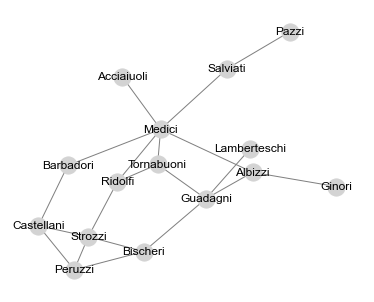

In [9]:
# data on florentine marriage families in the XV century
G = nx.florentine_families_graph()
print("Nodes: ", G.nodes())
print("Edges: ", G.edges())

# create figure and plot
plt.figure(figsize=(5,4))

# create layout (once so we can reuse it if needed)
pos = nx.spring_layout(G, seed = 1)
nx.draw(G, pos = pos, with_labels = True, 
        edge_color = "gray", node_color = "lightgray")

## 1.2. Read and visualize your network
Network here: https://tinyurl.com/network-game
(download it as a CSV file and move it to the folder of this notebook) 

Use the nx.read_edgelist function
Print number of nodes and edges

In [ ]:
# Read edgelist
df = pd.read_csv()
# Convert to networkx
G = nx.from_pandas_edgelist(df, source="P1", target="P2")
print(len(G.nodes()))
print(len(G.edges()))

In [ ]:
# create figure and plot
plt.figure(figsize=(10,8))

# create layout (once so we can reuse it if needed)
pos = nx.spring_layout(G, seed = 1)
nx.draw(G, pos = pos, with_labels = True, node_size=10,
        edge_color = "lightgray", node_color = "gray")

## 1.3. Read and visualize the Twitter network

We will be using (parts of) this network in the following days

Use the nx.read_edgelist function
Print number of nodes and edges

In [10]:
# Read edgelist
df = pd.read_csv("../Data/ic2s2_netsci_3.tsv", sep="\t")

# Convert to networkx
G = nx.from_pandas_edgelist(df)
G.remove_edges_from(nx.selfloop_edges(G)) #remove self-edges
print(len(G.nodes()))
print(len(G.edges()))

1554
30412


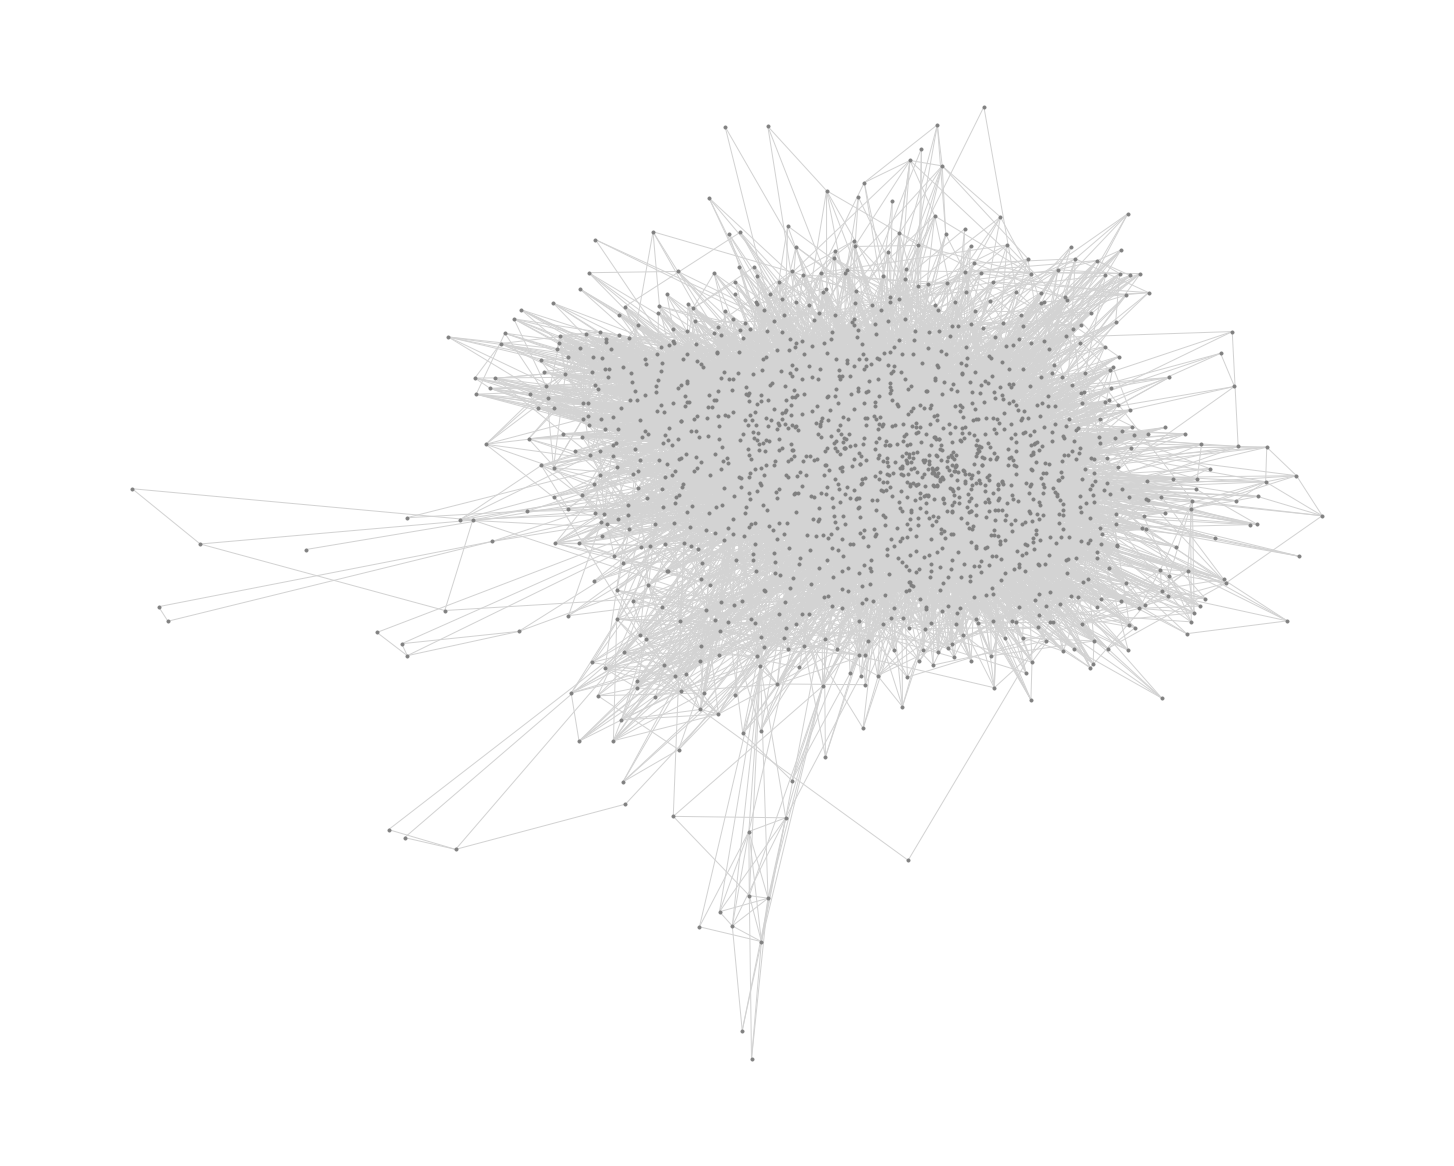

In [11]:
# create figure and plot
plt.figure(figsize=(20,16))

# create layout (once so we can reuse it if needed)
pos = nx.spring_layout(G, seed = 1)
nx.draw(G, pos = pos, with_labels = False, node_size=10,
        edge_color = "lightgray", node_color = "gray")

## 1.4. Read and visualize a large(r) network 
- Read network in "./data/wiki-Vote.txt". Careful, it is a directed network, you need to use the create_using parameter.

(use iterations = 30 in the spring_layout)


In [19]:
# Read directed graph
G_wiki = nx.read_edgelist("../Data/wiki-Vote.txt", create_using=nx.DiGraph())
print(len(G_wiki.nodes()))
print(len(G_wiki.edges()))

7115
103689


In [20]:
# Create layout (this will take a couple minutes). Networkx is a particularly slow library
pos = nx.spring_layout(G_wiki, seed = 1, iterations=30)

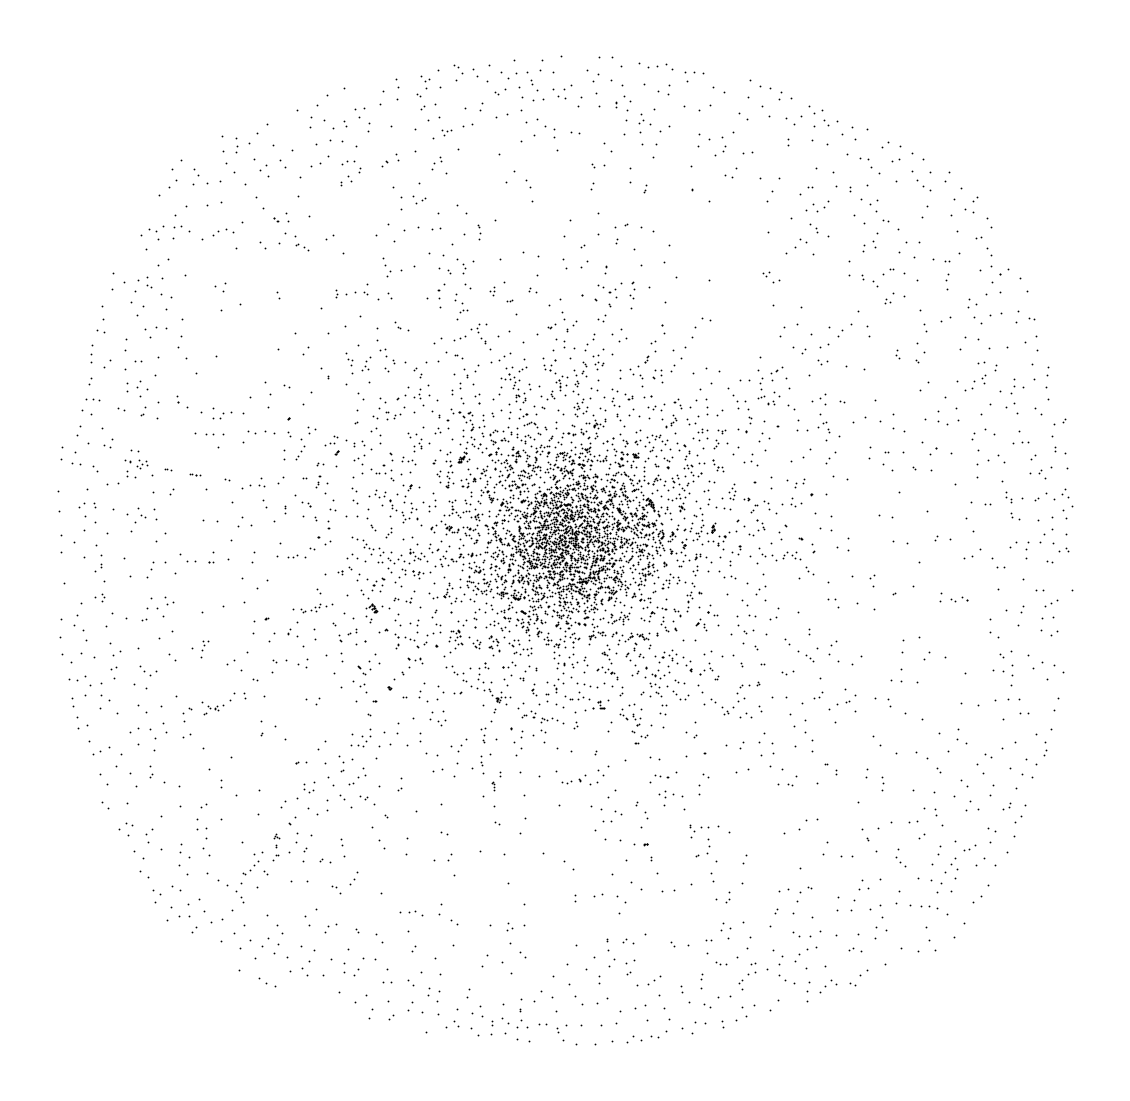

In [21]:
# Nobody wants to see your hairball, but let's plot it anyway
plt.figure(figsize=(20, 20))

# Plot only nodes (too many lines)
nx.draw_networkx_nodes(G_wiki, pos = pos, node_size = 1, node_color = "k")


# Exercise 2: Describe the network, compare with random networks:
- (random random (Erdős-Rény), scale-free network (Barábasi-Albert), configuration model)

Find the following attributes
- Number of nodes
- Number of edges
- Average degree
- Density
- Clustering coefficient
- Number of triangles
- Assortativity
- Diameter
- Are there node disconnected? (see nx.number_of_isolates)

In [22]:
# Read data on florentine marriage families in the XV century
G = nx.florentine_families_graph()


In [23]:
# List of nodes
list(G.nodes())

['Acciaiuoli',
 'Medici',
 'Castellani',
 'Peruzzi',
 'Strozzi',
 'Barbadori',
 'Ridolfi',
 'Tornabuoni',
 'Albizzi',
 'Salviati',
 'Pazzi',
 'Bischeri',
 'Guadagni',
 'Ginori',
 'Lamberteschi']

In [24]:
# List of edges
list(G.edges())

[('Acciaiuoli', 'Medici'),
 ('Medici', 'Barbadori'),
 ('Medici', 'Ridolfi'),
 ('Medici', 'Tornabuoni'),
 ('Medici', 'Albizzi'),
 ('Medici', 'Salviati'),
 ('Castellani', 'Peruzzi'),
 ('Castellani', 'Strozzi'),
 ('Castellani', 'Barbadori'),
 ('Peruzzi', 'Strozzi'),
 ('Peruzzi', 'Bischeri'),
 ('Strozzi', 'Ridolfi'),
 ('Strozzi', 'Bischeri'),
 ('Ridolfi', 'Tornabuoni'),
 ('Tornabuoni', 'Guadagni'),
 ('Albizzi', 'Ginori'),
 ('Albizzi', 'Guadagni'),
 ('Salviati', 'Pazzi'),
 ('Bischeri', 'Guadagni'),
 ('Guadagni', 'Lamberteschi')]

In [25]:
# Number of nodes
len(G.nodes())

15

In [26]:
# Number of edges
len(G.edges())

20

In [27]:
# Degree
nx.degree(G)

DegreeView({'Acciaiuoli': 1, 'Medici': 6, 'Castellani': 3, 'Peruzzi': 3, 'Strozzi': 4, 'Barbadori': 2, 'Ridolfi': 3, 'Tornabuoni': 3, 'Albizzi': 3, 'Salviati': 2, 'Pazzi': 1, 'Bischeri': 3, 'Guadagni': 4, 'Ginori': 1, 'Lamberteschi': 1})

#### We can compare our network to randomly generated data (this is useful to test hypothesis/get a baseline)

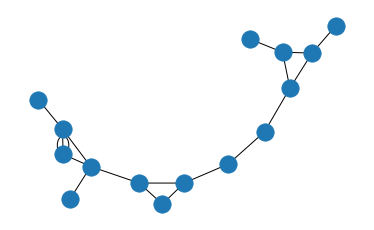

In [28]:
# Visualize random graphs (run several times, using the different models)
degree_seq = [v for k,v in G.degree()]
G_r = nx.configuration_model(degree_seq)
G_r = nx.Graph(G_r)
nx.draw(G_r)

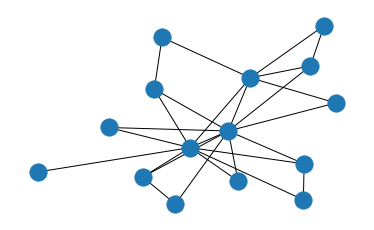

In [29]:
# Visualize random graphs (run several times)
n = len(G)
m = len(G.edges())
G_r = nx.random_graphs.barabasi_albert_graph(n,int(m/n)+1)
G_r = nx.Graph(G_r)
nx.draw(G_r)

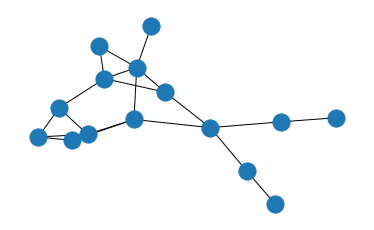

In [30]:
# Visualize random graphs (run several times)
n = len(G)
m = len(G.edges())
G_r = nx.random_graphs.gnm_random_graph(n,m)
G_r = nx.Graph(G_r)
nx.draw(G_r)

#### The function conf_int (defined in common_functions.py) creates 100 random graphs and calculates the desired metric

In [31]:
# Density
conf_int(G, nx.density, 100)
nx.density(G)

Conf. model 0.190 - 0.190
ER graph 0.190 - 0.190
BA graph 0.190 - 0.190


0.19047619047619047

In [32]:
# Average local clustering coefficient
conf_int(G, nx.average_clustering, 100)
nx.average_clustering(G)
#same as np.mean(list(nx.clustering(G).values()))

Conf. model 0.038 - 0.231
ER graph 0.000 - 0.300
BA graph 0.074 - 0.394


0.16

In [33]:
# Transitivity (global clustering)
conf_int(G, nx.transitivity, 100)
nx.transitivity(G)

Conf. model 0.064 - 0.319
ER graph 0.060 - 0.294
BA graph 0.061 - 0.278


0.19148936170212766

In [34]:
# Number of triangles
conf_int(G, lambda x: sum(nx.triangles(x).values())/3, 100)

triangles_by_node = nx.triangles(G)
sum(triangles_by_node.values())/3

Conf. model 1.000 - 4.000
ER graph 1.000 - 6.000
BA graph 0.950 - 5.000


3.0

In [35]:
# Assortativity
conf_int(G, nx.assortativity.degree_assortativity_coefficient, 100)
nx.assortativity.degree_assortativity_coefficient(G)


Conf. model -0.427 - 0.092
ER graph -0.445 - 0.106
BA graph -0.501 - -0.075


-0.37483787289234866

In [36]:
# Diameter
conf_int(G, nx.diameter, 100)
nx.diameter(G)


Conf. model 4.000 - 6.000
ER graph 4.000 - 6.750
BA graph 4.000 - 6.000


5

In [37]:
# Number of isolates
conf_int(G, nx.number_of_isolates, 100)

nx.number_of_isolates(G)

Conf. model 0.000 - 0.000
ER graph 0.000 - 2.000
BA graph 0.000 - 1.000


0

## 2.1 Compare those measures with the ones from the Twitter data
Mentions between people that used the #netsci or #ic2s2 hashtags

In [38]:

# Read data on Twitter (NetSci and IC2S2 conferences)
df = pd.read_csv("../Data/ic2s2_netsci_3.tsv", sep="\t")
G_twitter = nx.from_pandas_edgelist(df)
G_twitter.remove_edges_from(nx.selfloop_edges(G)) #remove self-edges

In [39]:
print("Diam", nx.diameter(G_twitter))
print("Assort", nx.assortativity.degree_assortativity_coefficient(G_twitter))
print("Densit", nx.density(G_twitter))
print("Average local clustering", nx.average_clustering(G_twitter))
print("Global clustering", nx.transitivity(G_twitter))

Diam 6
Assort -0.024370539945961448
Densit 0.02572593750958207
Average local clustering 0.3489598023492283
Global clustering 0.21338970926777667


# Exercise 3: Distributions
- Degree
- Number of triangles
- Clustering (transitivity)
- Local assortativity (homophily)
- Path length

In [40]:
# Use the following function to plot the CDF of the degree distributions
def plot_cdf(values, scale = "log", ax = None, cum = True, compl = False, marker = 'o-', xlabel = "Degree (d)", ylabel = "p(Degree < d)"):
    """
    Calculates and plot CDF
    """
    
    from collections import Counter

    # count the number of instance per each degree, sort it
    C = Counter(values)
    deg, cnt = zip(*sorted(C.items()))
    
    # calcualte the cumulative distribution, normalize to be a probability instead of a count
    if cum:
        cs = np.cumsum(cnt)/np.sum(cnt)
    else:
        cs = cnt/np.sum(cnt)
    
    if compl:
        cs = 1 - cs
        
    if ax is None:
        ax = plt.subplot()
    # plot
    ax.plot(deg, cs, marker)
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    plt.tight_layout()
    sns.despine(left=True, bottom=True)
    plt.xscale(scale)
    plt.yscale(scale)
    

## 3.1 Degree distribution

In [41]:
def plot_network_distribution(G, values, mult = 1000):
    """
    Plots network (color and node size depends on values) and distributions
    """
    import matplotlib as mpl
    norm = mpl.colors.Normalize(vmin=min(values), vmax=max(values), clip=True)
    mapper = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.coolwarm)


    f, (a0, a1, a2) = plt.subplots(1, 3, gridspec_kw={'width_ratios': [2, 1, 1]}, figsize=(12,4))
    
    node_size = mult*np.array(list(values))
    if min(node_size) < 0:
        node_size -= min(node_size)
        node_size += 1
        
    nx.draw(G, pos = nx.spring_layout(G, seed = 1), with_labels = True, node_size = node_size, edge_color = "gray", 
           node_color = [mapper.to_rgba(i) for i in values], ax = a0,)


    sns.histplot(values, ax = a1)
    
    
    plot_cdf(values, ax = a2, compl = False, xlabel = "Cent c", ylabel = "p(Cent > c)")

[('Acciaiuoli', 1),
 ('Medici', 6),
 ('Castellani', 3),
 ('Peruzzi', 3),
 ('Strozzi', 4),
 ('Barbadori', 2),
 ('Ridolfi', 3),
 ('Tornabuoni', 3),
 ('Albizzi', 3),
 ('Salviati', 2),
 ('Pazzi', 1),
 ('Bischeri', 3),
 ('Guadagni', 4),
 ('Ginori', 1),
 ('Lamberteschi', 1)]

[1, 1, 1, 1, 2, 2, 3, 3, 3, 3, 3, 3, 4, 4, 6]


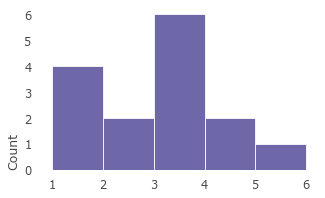

In [42]:
# Degree distribution
degree = G.degree() #also nx.degree(G)
degree_values = [degree for node, degree in degree]
display(list(zip(G.nodes(), degree_values)))

# Plot using sns.histplot
sns.histplot(degree_values)
print(sorted(degree_values))

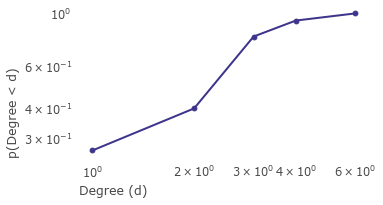

In [43]:
# Plot CDF in log-log scale
plot_cdf(degree_values, scale = "log", ax = None, cum = True, compl = False)

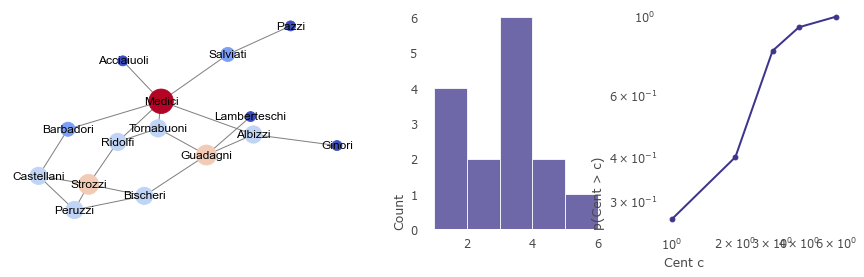

In [44]:
plot_network_distribution(G, degree_values, mult = 100)

## 3.2 Distribution of number of triangles

[('Acciaiuoli', 0),
 ('Medici', 1),
 ('Castellani', 1),
 ('Peruzzi', 2),
 ('Strozzi', 2),
 ('Barbadori', 0),
 ('Ridolfi', 1),
 ('Tornabuoni', 1),
 ('Albizzi', 0),
 ('Salviati', 0),
 ('Pazzi', 0),
 ('Bischeri', 1),
 ('Guadagni', 0),
 ('Ginori', 0),
 ('Lamberteschi', 0)]

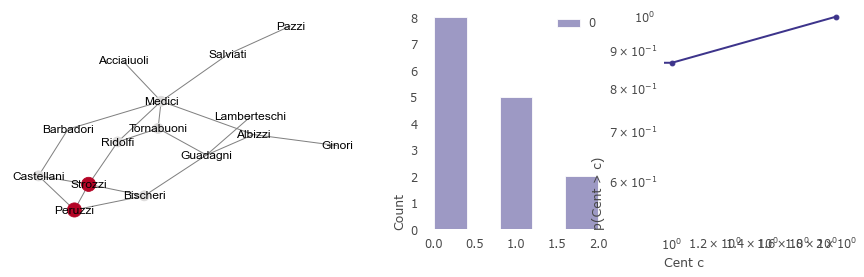

In [45]:
# Distribution of the number of triangles per node
n_triangs = nx.triangles(G).values() 
display(list(zip(G.nodes(), n_triangs)))

plot_network_distribution(G, n_triangs, mult = 100)

## 3.3 Distribution of clustering

[('Acciaiuoli', 0),
 ('Medici', 0.06666666666666667),
 ('Castellani', 0.3333333333333333),
 ('Peruzzi', 0.6666666666666666),
 ('Strozzi', 0.3333333333333333),
 ('Barbadori', 0),
 ('Ridolfi', 0.3333333333333333),
 ('Tornabuoni', 0.3333333333333333),
 ('Albizzi', 0),
 ('Salviati', 0),
 ('Pazzi', 0),
 ('Bischeri', 0.3333333333333333),
 ('Guadagni', 0),
 ('Ginori', 0),
 ('Lamberteschi', 0)]

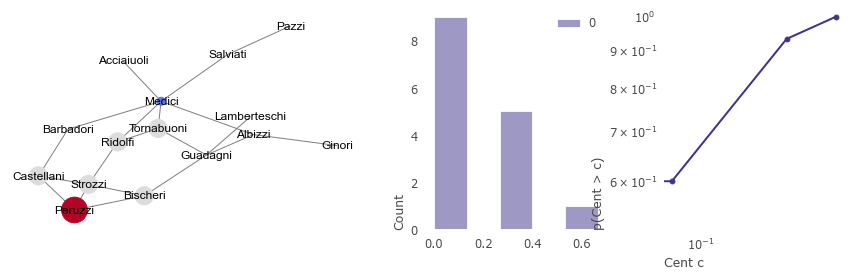

In [46]:
n_clus = nx.clustering(G).values()
display(list(zip(G.nodes(), n_clus)))

plot_network_distribution(G, n_clus, mult = 1000)

### 3.4 Distribution of shortest paths

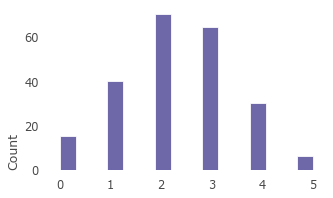

In [47]:
# Calculate all shortest paths (careful, this quickly becomes unfeasible)
path_lenghts = nx.shortest_path_length(G)

# Get results from a nested dictionary
path_lenghts = [list(_[1].values()) for _ in path_lenghts]
path_lenghts = [subitem for item in path_lenghts for subitem in item ]

# Plot using sns.histplot
sns.histplot(path_lenghts)
plt.show()

## 3.5 Distribution of local assortativity

[('Acciaiuoli', -0.6808969026392604),
 ('Medici', -0.021174869563784306),
 ('Castellani', 0.007141719383490342),
 ('Peruzzi', 0.012639185707593273),
 ('Strozzi', 0.017994443222937598),
 ('Barbadori', -0.08452005352503844),
 ('Ridolfi', 0.03000675226701813),
 ('Tornabuoni', 0.030636247828207466),
 ('Albizzi', 0.020951434083395542),
 ('Salviati', -0.05381721467845225),
 ('Pazzi', 0.13130884983721394),
 ('Bischeri', 0.016882042111539906),
 ('Guadagni', -0.004185357392913659),
 ('Ginori', -0.0636397008162419),
 ('Lamberteschi', -0.26094765764931316)]

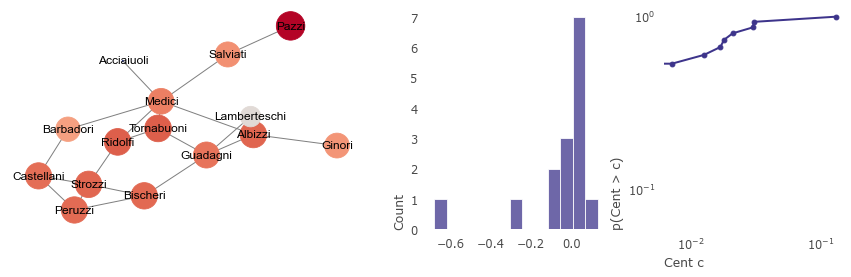

In [48]:
attribute = [k for v,k in G.degree()]
# Defined in common_functions (based on Peel et al 2018)
local_assort = calculate_local_assort(G, attribute)
display(list(zip(G.nodes(), local_assort)))

plot_network_distribution(G, local_assort, mult = 1000)

## 3.6 Degree distribution if ~ normal distribution (used in the lectures)
- Try changing the scale

Text(0.0, 1.0, 'CCDF')

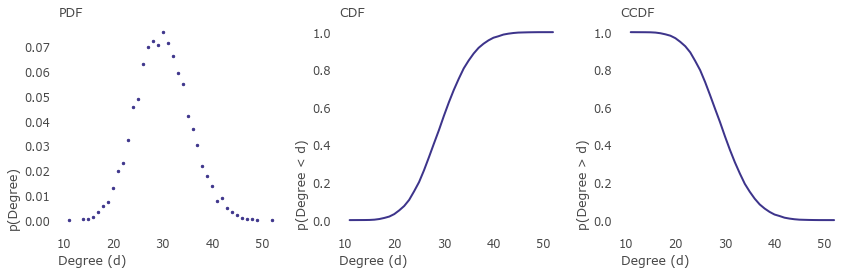

In [49]:
## Degree distribution (random normally distributed data)
d = np.random.binomial(500, p = 30/500, size = 10000)

plt.figure(figsize=(12,4))
ax = plt.subplot(131)
plot_cdf(d, cum = False, ax = ax,  xlabel = "Degree (d)", ylabel = "p(Degree)", marker = ".", scale = "linear")
plt.title("PDF")
ax = plt.subplot(132)
plot_cdf(d, cum = True, ax = ax,  xlabel = "Degree (d)", ylabel = "p(Degree < d)", marker="-", scale = "linear")
plt.title("CDF")
ax = plt.subplot(133)
plot_cdf(d, compl = True, ax = ax,  xlabel = "Degree (d)", ylabel = "p(Degree > d)", marker="-", scale = "linear")
plt.title("CCDF")


## 3.7 Degree distribution in the wiki network

In [50]:
## Degree distribution (wiki network)
# Try the code using scale = "linear"
G_wiki = nx.read_edgelist("./data/wiki-Vote.txt", create_using=nx.DiGraph())
d = [v for k,v in G_wiki.degree()]
plt.figure(figsize=(12,4))
ax = plt.subplot(131)
plot_cdf(d, cum = False, ax = ax,  xlabel = "Degree (d)", ylabel = "p(Degree)", marker = ".", scale="log")
plt.plot([7E1, 5E2],[2.5E-3,1E-4],"--")
plt.title("PDF")
ax = plt.subplot(132)
plot_cdf(d, cum = True, ax = ax,  xlabel = "Degree (d)", ylabel = "p(Degree < d)", marker="-", scale="log")
plt.title("CDF")
ax = plt.subplot(133)
plot_cdf(d, compl = True, ax = ax,  xlabel = "Degree (d)", ylabel = "p(Degree > d)", marker=".-", scale="log")
plt.title("CCDF")
plt.xlim(2E2,1E3)
plt.plot([2E2, 1E3], [2.5E-2,2.5E-4],"--")


FileNotFoundError: [Errno 2] No such file or directory: './data/wiki-Vote.txt'

# Exercise 4 (similar to QAP)
Is the network homophilic? (are people linked to people like them?)

Solution: Shuffle the node labels

In [ ]:
# Create random labels

ns = ['Acciaiuoli', 'Medici', 'Castellani', 'Peruzzi', 'Strozzi', 'Barbadori', 'Ridolfi', 'Tornabuoni', 'Albizzi', 'Salviati', 'Pazzi', 'Bischeri', 'Guadagni', 'Ginori', 'Lamberteschi']
classes = ["m", "m", "o", "o", "o", "o", "o", "m", "m", "m", "o", "o", "o", "o", "o"]
nx.set_node_attributes(G, dict(zip(ns,classes)), "classes")

# Plot
nx.draw(G, pos = nx.spring_layout(G, seed = 1), with_labels = True, edge_color = "gray", 
       node_color = [palette[0] if c == "m" else palette[1] for c in classes])
    

# calculate assortativity coefficient
assort = nx.assortativity.attribute_assortativity_coefficient(G, "classes")
assort

In [ ]:
# Permutenode labels
G2 = G.copy()

# Randomize classes and calculate assortativity
iters = 10000
values = []
for i in range(iters):
    # shuffle the classes
    nx.set_node_attributes(G2, dict(zip(ns,np.random.permutation(classes))), "classes")
    # calculate assortativity and keep in a list
    values.append(nx.assortativity.attribute_assortativity_coefficient(G2, "classes"))
values = np.array(values)

# Plot results
sns.histplot(values, binwidth=0.05)
plt.plot([assort,assort],[0,iters/10], "--", color="gray")

# p-value (probability that we would observe a value equal or more extreme to the one observed given 
# that the null hyphotesis is true---i.e. the graph is the real graph and the links 
# are not correlated with the classes
1-len(values[values<assort])/len(values)

# Exercise 5

Use igraph to read the network and calculate assortativity

In [ ]:
G_wiki = nx.read_edgelist("../Data/wiki-Vote.txt", create_using=nx.DiGraph())
# Read directed graph
print(len(G_wiki.nodes()))
print(len(G_wiki.edges()))

# Convert to igraph
h = ig.Graph.from_networkx(G_wiki)

# Look at how much faster it is (700 times slower in my computer)
%timeit h.assortativity_degree()
%timeit nx.assortativity.degree_assortativity_coefficient(G_wiki)

## 5.1 Compare with random model (ER)

Repeat with a larger network (don't try the interactive)

In [16]:
# networkx
def conf_dens_nx(n, m):
    """Create random graph and calculate assortativity in networkx"""
    G_r = nx.random_graphs.gnm_random_graph(n,m)
    return nx.assortativity.degree_assortativity_coefficient(G_r)
def conf_dens_ig(n,m):
    """Create random graph and calculate assortativity in igraph"""
    h_r = ig.Graph.Erdos_Renyi(n=n,m=m)
    return h_r.assortativity_degree()

In [17]:
# Doing it in igraph 10 times
n, m = len(G_wiki), len(G_wiki.edges())
print(np.percentile([conf_dens_nx(n, m) for i in range(10)], [5,95]))

nx.assortativity.degree_assortativity_coefficient(G_wiki)

[-0.00557725  0.00065094]


-0.08324455771686787

In [18]:
# Doing it in igraph 100 times
n, m = h.vcount(), h.ecount()
print(np.percentile([conf_dens_ig(n,m) for i in range(100)], [5,95]))

h.assortativity_degree()

[-0.00568702  0.00292317]


-0.0832445577168681